In [1]:
import pandas as pd
import numpy as np

In [2]:
experimento= { "sujeto": ["S01","S02","S03", "S01","S01","S02"],
               "sabor":["chocolate","piñon","queso","angel","vainilla","choco"],
               "precio":[45,105,30,60,85,120],
               "tamaño":["med","gra","ch","med","gra","ch"]}

In [3]:
dafra=pd.DataFrame(experimento)

In [4]:
dafra["activación"]= [True,True,False,False,True,True] #agregar columna
print(dafra)

  sujeto      sabor  precio tamaño  activación
0    S01  chocolate      45    med        True
1    S02      piñon     105    gra        True
2    S03      queso      30     ch       False
3    S01      angel      60    med       False
4    S01   vainilla      85    gra        True
5    S02      choco     120     ch        True


In [5]:
dafra.sujeto

0    S01
1    S02
2    S03
3    S01
4    S01
5    S02
Name: sujeto, dtype: object

In [6]:
dafra[dafra["sujeto"]== "S01"] #filtrado condicional a todas las filas que cumplen la condicion

,sujeto,sabor,precio,tamaño,activación
0,S01,chocolate,45,med,True
3,S01,angel,60,med,False
4,S01,vainilla,85,gra,True


In [7]:
dafra[dafra["precio"]>100]

,sujeto,sabor,precio,tamaño,activación
1,S02,piñon,105,gra,True
5,S02,choco,120,ch,True


In [8]:
por_sujeto=dafra.groupby(by="sujeto")
por_sujeto.describe(include="all")

sabor                                                       ...  \
       count unique        top freq mean  std  min  25%  50%  75%  ...   
sujeto                                                             ...   
S01        3      3  chocolate    1  NaN  NaN  NaN  NaN  NaN  NaN  ...   
S02        2      2      piñon    1  NaN  NaN  NaN  NaN  NaN  NaN  ...   
S03        1      1      queso    1  NaN  NaN  NaN  NaN  NaN  NaN  ...   

       activación                                                 
           unique    top freq mean  std  min  25%  50%  75%  max  
sujeto                                                            
S01             2   True    2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
S02             1   True    2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
S03             1  False    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 44 columns]

In [9]:
tipos_sujetos= ["S"+ str(i).zfill(2)for i in range (4)]
generos=["M","F"]
condicion=["control","experimental"]
region=["hipocampo","PFC","amígdala"]
neurotransmisores=["dopamina","serotonina"]
#crear DF 200 filas
#las columnas que están arriba con distr normal
#agregar col llamada precisión con dstr normal y mu= 0.92 y sigma= 0.08
#se pretenden simular los datos de un estudio en el que se miden las var cognitivas y fisiológicas en
#dif regiones cerebrales sujetos y condiciones


In [10]:
n = 200
sujetos = np.random.choice(tipos_sujetos, n)
sexos = np.random.choice(generos, n)
condiciones = np.random.choice(condicion, n)
regiones = np.random.choice(region, n)
neurots = np.random.choice(neurotransmisores, n)

# precisión ~ Normal(0.92, 0.08)
precision = np.random.normal(loc=0.92, scale=0.08, size=n)

# limitar precisión entre 0 y 1 (si se quiere realista como proporción)
precision = np.clip(precision, 0, 1)

# crear DataFrame
df = pd.DataFrame({
    "Sujeto": sujetos,
    "Genero": sexos,
    "Condicion": condiciones,
    "Region": regiones,
    "Neurotransmisor": neurots,
    "Precision": precision
})


In [11]:
df

,Sujeto,Genero,Condicion,Region,Neurotransmisor,Precision
0,S02,F,experimental,PFC,serotonina,0.986853
1,S00,F,control,PFC,serotonina,0.853042
2,S01,M,experimental,hipocampo,serotonina,0.933576
3,S01,M,control,amígdala,dopamina,0.836149
4,S02,M,experimental,PFC,dopamina,0.927884
...,...,...,...,...,...,...
195,S02,M,control,hipocampo,serotonina,0.914849
196,S00,M,experimental,PFC,serotonina,0.931297
197,S00,F,experimental,PFC,dopamina,0.900795
198,S03,M,control,amígdala,dopamina,0.961371


In [12]:
#generar h8istograma de cuantos datos por sujeto se tienen y mostrar en un histograma la proporcion de neurotransmisor

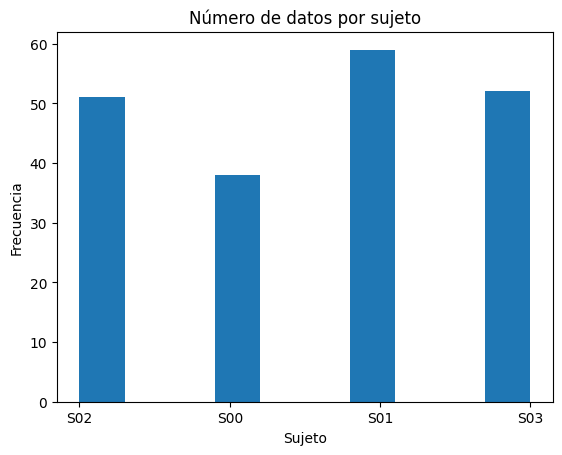

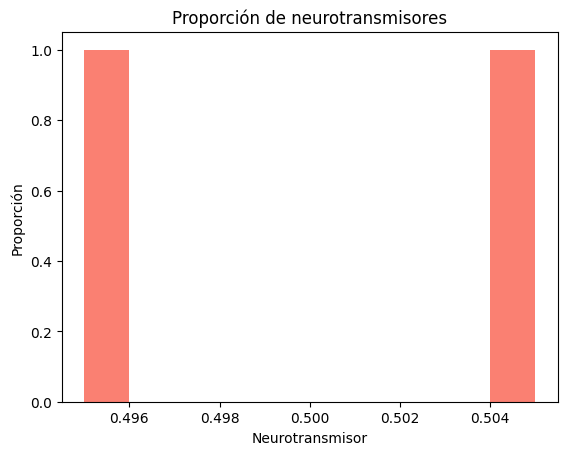

In [13]:
import matplotlib.pyplot as plt

#  Histograma 1: conteo de datos por sujeto
df['Sujeto'].value_counts().sort_index()
plt.hist(df["Sujeto"])
plt.title("Número de datos por sujeto")
plt.xlabel("Sujeto")
plt.ylabel("Frecuencia")
plt.show()

# Histograma 2: proporción de neurotransmisores 
plt.hist(df['Neurotransmisor'].value_counts(normalize=True),color=['salmon'])
plt.title("Proporción de neurotransmisores")
plt.xlabel("Neurotransmisor")
plt.ylabel("Proporción")
plt.show()


In [14]:
#para cada sujeto calcular la proporción del tipo de condición
#para cada sujeto, calcular el máximo, mínimo y la media de su precisión
#para cada condición, hacer el histograma de las regiones activadas
#y hacerlo mediante 2 métodos: filtrado de dataframes y usando groupby


In [17]:
#filtrado de df
for sujeto in df["Sujeto"].unique(): #se obtiene la lista única de sujetos
    datos_suj= df[df["Sujeto"]== sujeto] # nuevo df con solo filas de ese sujeto
    proporciones= datos_suj["Condicion"].value_counts(normalize=True) #conteo de cuantas filas de cada condición tiene ese sujeto
    print(f"\nSujeto {sujeto}:\n{proporciones}")


Sujeto S02:
Condicion
control         0.509804
experimental    0.490196
Name: proportion, dtype: float64

Sujeto S00:
Condicion
control         0.552632
experimental    0.447368
Name: proportion, dtype: float64

Sujeto S01:
Condicion
experimental    0.525424
control         0.474576
Name: proportion, dtype: float64

Sujeto S03:
Condicion
control         0.557692
experimental    0.442308
Name: proportion, dtype: float64


In [22]:
#filtrado mediante groupby
prop_cond = df.groupby(['Sujeto','Condicion']).size().groupby(level=0).apply(lambda x: x/x.sum())
prop_cond
#cuenta cuantas filas hay para cada combinación suj-cond
#esta es una alternativa:
#df.groupby('Sujeto')['Condicion'].value_counts(normalize=True)


Sujeto  Sujeto  Condicion   
S00     S00     control         0.552632
                experimental    0.447368
S01     S01     control         0.474576
                experimental    0.525424
S02     S02     control         0.509804
                experimental    0.490196
S03     S03     control         0.557692
                experimental    0.442308
dtype: float64

In [24]:
ejercicio= df[(df["Sujeto"]=="S00")&(df["Condicion"]=="control")]
ejercicio.head(3)

,Sujeto,Genero,Condicion,Region,Neurotransmisor,Precision
1,S00,F,control,PFC,serotonina,0.853042
5,S00,F,control,amígdala,dopamina,0.879949
18,S00,F,control,amígdala,serotonina,0.990130


In [ ]:
#método 1
for sujeto in df['Sujeto'].unique():
    datos_suj = df[df['Sujeto'] == sujeto]#sub set por sujeto
    print(f"\nSujeto {sujeto}:")
    print(f"  Min: {datos_suj['Precision'].min():.3f}")
    print(f"  Max: {datos_suj['Precision'].max():.3f}")
    print(f"  Media: {datos_suj['Precision'].mean():.3f}")


In [25]:
#groupby
stats_prec = df.groupby('Sujeto')['Precision'].agg(['min','max','mean'])
stats_prec


,min,max,mean
Sujeto,,,
S00,0.748342,1.0,0.905783
S01,0.694540,1.0,0.915678
S02,0.710670,1.0,0.916014
S03,0.675866,1.0,0.919458


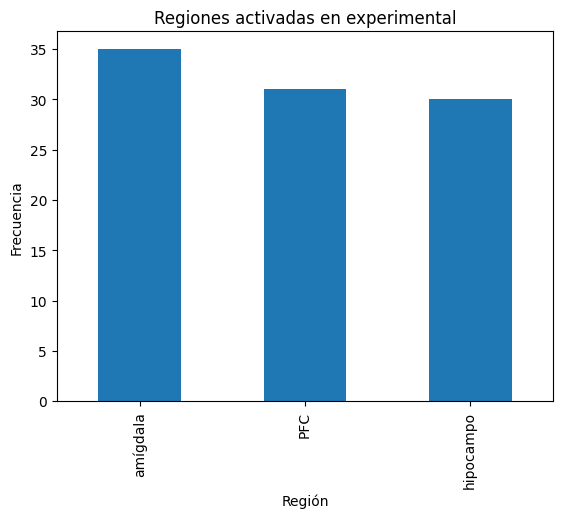

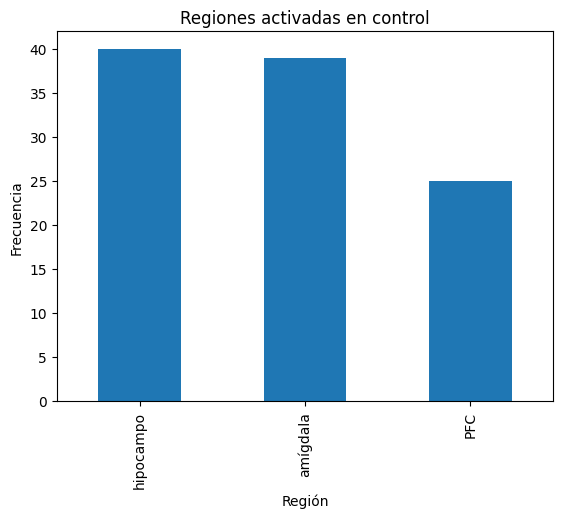

In [21]:
import matplotlib.pyplot as plt

for cond in df['Condicion'].unique():
    datos_cond = df[df['Condicion'] == cond]
    plt.figure()
    datos_cond['Region'].value_counts().plot(kind='bar')
    plt.title(f"Regiones activadas en {cond}")
    plt.xlabel("Región")
    plt.ylabel("Frecuencia")
    plt.show()


In [26]:
def funcion(string):
    return string.upper()

In [27]:
df["Region"].apply(funcion)

0            PFC
1            PFC
2      HIPOCAMPO
3       AMÍGDALA
4            PFC
         ...    
195    HIPOCAMPO
196          PFC
197          PFC
198     AMÍGDALA
199     AMÍGDALA
Name: Region, Length: 200, dtype: object

In [28]:
df["Region"].apply(lambda string: string.upper())
#define una función rápida que recibe un string y devuelve su versión en mayúsculas

0            PFC
1            PFC
2      HIPOCAMPO
3       AMÍGDALA
4            PFC
         ...    
195    HIPOCAMPO
196          PFC
197          PFC
198     AMÍGDALA
199     AMÍGDALA
Name: Region, Length: 200, dtype: object